## Pandas Basics

In [1]:
import pandas as pd

In [2]:
from sklearn.datasets import load_iris

There is a pair
6 2
There is a pair
4 4


In [3]:
iris = load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris_data = pd.DataFrame(iris.data,columns=['sepal_length','sepal_width','petal_length','petal_width'])

In [5]:
iris_data.head(10)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [6]:
target = pd.Series(iris.target,name = 'type')

In [7]:
iris_data = pd.concat([iris_data,target],axis=1)

In [8]:
iris_data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [9]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
iris_data['type'] = iris_data.type.map({0:'setosa',1:'versicolor',2:'virginica'})

In [11]:
iris_data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,type
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [12]:
X = iris_data.drop(columns='type',axis=1)

In [13]:
y = iris_data['type']

In [14]:
type(X)

pandas.core.frame.DataFrame

In [15]:
type(y)

pandas.core.series.Series

In [16]:
X.shape

(150, 4)

In [17]:
y.shape

(150,)

## Training and Testing on Same Data

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
knn = KNeighborsClassifier(n_neighbors=1)

In [20]:
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [21]:
y_pred = knn.predict(X)

In [22]:
from sklearn import metrics
metrics.accuracy_score(y,y_pred)

1.0

In [23]:
X_new =[[3,4,5,2],[5,4,3,2]]

In [24]:
knn.predict(X_new)

array(['virginica', 'versicolor'], dtype=object)

In [25]:
knn = KNeighborsClassifier(n_neighbors=5)

In [26]:
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [27]:
y_pred = knn.predict(X)

In [28]:
metrics.accuracy_score(y,y_pred)

0.9666666666666667

In [29]:
X_new =[[3,4,5,2],[5,4,3,2]]

In [30]:
knn.predict(X_new)

array(['versicolor', 'versicolor'], dtype=object)

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
logreg = LogisticRegression(solver='lbfgs',multi_class='auto')

In [33]:
logreg.fit(X,y)

/usr/lib/python3/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [34]:
y_pred = logreg.predict(X)
metrics.accuracy_score(y,y_pred)

0.9733333333333334

In [35]:
logreg.predict(X_new)

array(['virginica', 'setosa'], dtype=object)

## Spliting data into Train/Test

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

0.9333333333333333

In [38]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.9166666666666666

In [39]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs',multi_class='auto')
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

/usr/lib/python3/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9333333333333333

In [40]:
accuracy = []
k_range = range(1,26)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test,y_pred))

In [41]:
accr = pd.Series(accuracy)

In [42]:
accr.head(10)

0    0.916667
1    0.883333
2    0.933333
3    0.883333
4    0.933333
5    0.916667
6    0.933333
7    0.933333
8    0.933333
9    0.933333
dtype: float64

In [43]:
print("Best k value:",accuracy.index(accr.max())+1)

Best k value: 3


Text(0, 0.5, 'Accuracy')

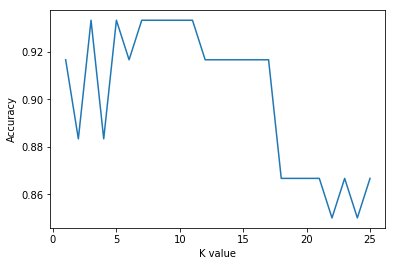

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(k_range,accuracy)
plt.xlabel('K value')
plt.ylabel('Accuracy')

## Cross-Validation

In [45]:
from sklearn.model_selection import cross_val_score

In [46]:
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn,X,y,cv=10,scoring='accuracy')
print(scores)

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]


In [47]:
print(scores.mean())

0.9666666666666668


In [48]:
accuracy = []
k_range = range(1,31)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,X,y,cv=10,scoring='accuracy')
    accuracy.append(scores.mean())

Text(0, 0.5, 'Accuracy')

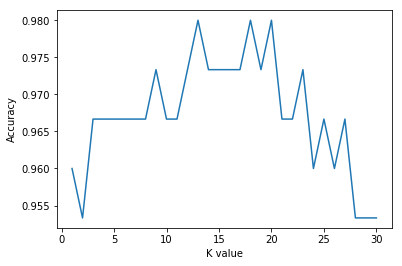

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(k_range,accuracy)
plt.xlabel('K value')
plt.ylabel('Accuracy')

In [50]:
accr = pd.Series(accuracy)
print("Best k value:",accuracy.index(accr.max())+1)

Best k value: 13


In [51]:
knn = KNeighborsClassifier(n_neighbors=13)
scores = cross_val_score(knn,X,y,cv=10,scoring='accuracy')
print(scores.mean())

0.9800000000000001


In [52]:
from sklearn.model_selection import cross_val_predict
y_pred_class = cross_val_predict(knn, X, y, cv=10)
metrics.confusion_matrix(y, y_pred_class)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  1, 49]])

## Comparing KNN with Logistic Regression

In [53]:
knn = KNeighborsClassifier(n_neighbors=13)
cross_val_score(knn,X,y,cv=10,scoring='accuracy').mean()

0.9800000000000001

In [54]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs',multi_class='auto')
print(cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())

/usr/lib/python3/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/lib/python3/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/lib/python3/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/lib/python3/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/lib/python3/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/lib/python3/dist-packages/sklearn/linear_mode

0.9733333333333334


## Cross_Validation: Feature_Selection

In [55]:
data = pd.read_csv('Machine Learning/Advertising.csv')

In [56]:
data.head(10)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [57]:
data = data.drop(columns='Unnamed: 0',axis=1)
data.head(10)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [58]:
feature_cols = ['TV','radio','newspaper']

In [59]:
X = data[feature_cols]
y = data.sales

In [60]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
scores = cross_val_score(lr,X,y,cv=10,scoring='neg_mean_squared_error')
mse_scores = -scores
print(mse_scores)

[3.56038438 3.29767522 2.08943356 2.82474283 1.3027754  1.74163618
 8.17338214 2.11409746 3.04273109 2.45281793]


In [61]:
import numpy as np
print(np.sqrt(mse_scores))

[1.88689808 1.81595022 1.44548731 1.68069713 1.14139187 1.31971064
 2.85891276 1.45399362 1.7443426  1.56614748]


In [62]:
np.sqrt(mse_scores).mean()

1.6913531708051792

In [63]:
feature_cols = ['TV','radio']
X = data[feature_cols]
y = data.sales

In [64]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
scores = cross_val_score(lr,X,y,cv=10,scoring='neg_mean_squared_error')
mse_scores = -scores
print(mse_scores)

[3.38264572 3.28736055 2.09185507 2.81784389 1.27311083 1.74391853
 8.0006111  2.07650936 3.03635301 2.4289835 ]


In [65]:
import numpy as np
print(np.sqrt(mse_scores))

[1.83919703 1.81310798 1.44632468 1.67864347 1.12832213 1.32057507
 2.82853515 1.44100984 1.74251342 1.55851965]


In [66]:
np.sqrt(mse_scores).mean()

1.6796748419090766

## More efficient Parameter tuning using GridSearchCV

In [67]:
iris_data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,type
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [68]:
X = iris_data.drop(columns='type',axis=1)

In [69]:
y = iris_data.type

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
k_range = range(1,31)
k_scores = []

In [72]:
param_grid = dict(n_neighbors=list(k_range))

In [73]:
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [74]:
grid = GridSearchCV(knn,param_grid,scoring='accuracy',cv=10,return_train_score=False)

In [75]:
grid.fit(X,y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=13, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='accuracy', verbose=0)

In [76]:
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.960000,0.053333,{'n_neighbors': 1}
1,0.953333,0.052068,{'n_neighbors': 2}
2,0.966667,0.044721,{'n_neighbors': 3}
3,0.966667,0.044721,{'n_neighbors': 4}
4,0.966667,0.044721,{'n_neighbors': 5}
5,0.966667,0.044721,{'n_neighbors': 6}
6,0.966667,0.044721,{'n_neighbors': 7}
7,0.966667,0.044721,{'n_neighbors': 8}
8,0.973333,0.032660,{'n_neighbors': 9}
9,0.966667,0.044721,{'n_neighbors': 10}


In [77]:
# examine the first result
print(grid.cv_results_['params'][0])
print(grid.cv_results_['mean_test_score'][0])

{'n_neighbors': 1}
0.96


In [78]:
# print the array of mean scores only
grid_mean_scores = grid.cv_results_['mean_test_score']
print(grid_mean_scores)

[0.96       0.95333333 0.96666667 0.96666667 0.96666667 0.96666667
 0.96666667 0.96666667 0.97333333 0.96666667 0.96666667 0.97333333
 0.98       0.97333333 0.97333333 0.97333333 0.97333333 0.98
 0.97333333 0.98       0.96666667 0.96666667 0.97333333 0.96
 0.96666667 0.96       0.96666667 0.95333333 0.95333333 0.95333333]


Text(0, 0.5, 'Cross-Validated Accuracy')

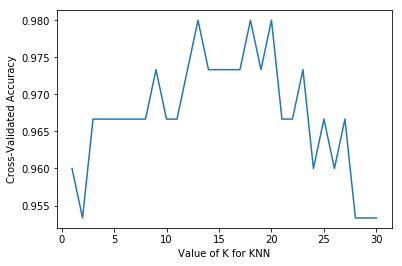

In [79]:
# plot the results
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [80]:
result = pd.Series(grid_mean_scores)
print("Best k value:",list(grid_mean_scores).index(result.max())+1)

Best k value: 13


In [81]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.98
{'n_neighbors': 13}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=13, p=2,
           weights='uniform')


In [82]:
knn = KNeighborsClassifier(n_neighbors=13)
cross_val_score(knn,X,y,cv=10,scoring='accuracy').mean()

0.9800000000000001

## Searching multiple parameters simultaneously

In [83]:
# define the parameter values that should be searched
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']

In [84]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [85]:
# instantiate and fit the grid
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='accuracy', verbose=0)

In [86]:
# view the results
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.960000,0.053333,"{'n_neighbors': 1, 'weights': 'uniform'}"
1,0.960000,0.053333,"{'n_neighbors': 1, 'weights': 'distance'}"
2,0.953333,0.052068,"{'n_neighbors': 2, 'weights': 'uniform'}"
3,0.960000,0.053333,"{'n_neighbors': 2, 'weights': 'distance'}"
4,0.966667,0.044721,"{'n_neighbors': 3, 'weights': 'uniform'}"
5,0.966667,0.044721,"{'n_neighbors': 3, 'weights': 'distance'}"
6,0.966667,0.044721,"{'n_neighbors': 4, 'weights': 'uniform'}"
7,0.966667,0.044721,"{'n_neighbors': 4, 'weights': 'distance'}"
8,0.966667,0.044721,"{'n_neighbors': 5, 'weights': 'uniform'}"
9,0.966667,0.044721,"{'n_neighbors': 5, 'weights': 'distance'}"


In [87]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.98
{'n_neighbors': 13, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=13, p=2,
           weights='uniform')


## Using the best parameters to make predictions

In [88]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=13,weights='uniform')
cross_val_score(knn,X,y,cv=10,scoring='accuracy').mean()

0.9800000000000001

In [89]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=13, p=2,
           weights='uniform')

In [90]:
# make a prediction on out-of-sample data
knn.predict([[3, 5, 4, 2]])

array(['versicolor'], dtype=object)

In [91]:
# shortcut: GridSearchCV automatically refits the best model using all of the data
grid.predict([[3, 5, 4, 2]])

array(['versicolor'], dtype=object)

## Reducing computational expense using RandomizedSearchCV

In [92]:
from sklearn.model_selection import RandomizedSearchCV

In [93]:
# specify "parameter distributions" rather than a "parameter grid"
param_dist = dict(n_neighbors=k_range, weights=weight_options)

In [94]:
# n_iter controls the number of searches
rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5, return_train_score=False)
rand.fit(X, y)
pd.DataFrame(rand.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.973333,0.032660,"{'weights': 'distance', 'n_neighbors': 16}"
1,0.966667,0.033333,"{'weights': 'uniform', 'n_neighbors': 22}"
2,0.980000,0.030551,"{'weights': 'uniform', 'n_neighbors': 18}"
3,0.966667,0.044721,"{'weights': 'uniform', 'n_neighbors': 27}"
4,0.953333,0.042687,"{'weights': 'uniform', 'n_neighbors': 29}"
5,0.973333,0.032660,"{'weights': 'distance', 'n_neighbors': 10}"
6,0.966667,0.044721,"{'weights': 'distance', 'n_neighbors': 22}"
7,0.973333,0.044222,"{'weights': 'uniform', 'n_neighbors': 14}"
8,0.973333,0.044222,"{'weights': 'distance', 'n_neighbors': 12}"
9,0.973333,0.032660,"{'weights': 'uniform', 'n_neighbors': 15}"


In [95]:
# examine the best model
print(rand.best_score_)
print(rand.best_params_)

0.98
{'weights': 'uniform', 'n_neighbors': 18}


In [96]:
# run RandomizedSearchCV 20 times (with n_iter=10) and record the best score
best_scores = []
for _ in range(20):
    rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10, return_train_score=False)
    rand.fit(X, y)
    best_scores.append(round(rand.best_score_, 3))
print(best_scores)

[0.98, 0.98, 0.973, 0.98, 0.98, 0.98, 0.973, 0.98, 0.98, 0.98, 0.973, 0.98, 0.98, 0.973, 0.98, 0.973, 0.98, 0.98, 0.98, 0.98]


## Classification Accuracy

In [97]:
data = pd.read_csv('Machine Learning/diabetes.csv')

In [98]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [99]:
# define X and y
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose']
X = data[feature_cols]
y = data.Outcome

In [100]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [101]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs',multi_class='auto')
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [102]:
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)

In [103]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.7864583333333334


In [104]:
y_test.value_counts()

0    130
1     62
Name: Outcome, dtype: int64

In [105]:
# calculate the percentage of ones
y_test.mean()

0.3229166666666667

In [106]:
# calculate the percentage of zeros
1 - y_test.mean()

0.6770833333333333

In [107]:
# calculate null accuracy (for binary classification problems coded as 0/1)
max(y_test.mean(), 1 - y_test.mean())

0.6770833333333333

In [108]:
# calculate null accuracy (for multi-class classification problems)
y_test.value_counts().head(1) / len(y_test)

0    0.677083
Name: Outcome, dtype: float64

In [109]:
pd.DataFrame({'True':y_test.values,'Predicted':y_pred_class}).head(20)

,True,Predicted
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0
5,0,0
6,1,1
7,1,1
8,0,0
9,0,0


## Confusion Matrix

In [110]:
# IMPORTANT: first argument is true values, second argument is predicted values
print(metrics.confusion_matrix(y_test, y_pred_class))

[[117  13]
 [ 28  34]]


In [111]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

## Metrics computed from a confusion matrix
**Classification Accuracy:** Overall, how often is the classifier correct?

In [112]:
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.7864583333333334
0.7864583333333334


**Classification Error:** Overall, how often is the classifier incorrect?

- Also known as "Misclassification Rate"

In [113]:
print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.21354166666666666
0.21354166666666663


**Sensitivity:** When the actual value is positive, how often is the prediction correct?

- How "sensitive" is the classifier to detecting positive instances?
- Also known as "True Positive Rate" or "Recall"

In [114]:
print(TP / float(TP + FN))
print(metrics.recall_score(y_test, y_pred_class))

0.5483870967741935
0.5483870967741935


**Specificity:** When the actual value is negative, how often is the prediction correct?

- How "specific" (or "selective") is the classifier in predicting negative instances?
- Also known as True Negative Rate(TNR)

In [115]:
print(TN/float(TN+FP))

0.9


__False Positive Rate:__ When the actual value is negative, how often is the prediction incorrect?

In [116]:
print(FP/float(TN+FP))

0.1


In [117]:
# 1 - Specificity
print(1-(TN/float(TN+FP)))

0.09999999999999998


**False Negative Rate:** ratio of negatives incorrectly predicted from all the false labels.

In [118]:
print(FN/float(FN+TP))

0.45161290322580644


In [119]:
# 1-Sensitivity
print(1-(TP / float(TP + FN)))

0.4516129032258065


**Precision:** When a positive value is predicted, how often is the prediction correct?

- How "precise" is the classifier when predicting positive instances?

In [120]:
print(TP/float(TP+FP))
print(metrics.precision_score(y_test, y_pred_class))

0.723404255319149
0.723404255319149


### Which metrics should you focus on?

- Choice of metric depends on your business objective
- Spam filter (positive class is "spam"): Optimize for precision or specificity because false negatives (spam goes to the inbox) are more acceptable than false positives (non-spam is caught by the spam filter)
- Fraudulent transaction detector (positive class is "fraud"): Optimize for sensitivity because false positives (normal transactions that are flagged as possible fraud) are more acceptable than false negatives (fraudulent transactions that are not detected)

## Adjusting the classification threshold

In [121]:
# print the first 10 predicted responses
logreg.predict(X_test)[0:10]

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0])

In [122]:
# print the first 10 predicted probabilities of class membership
logreg.predict_proba(X_test)[0:10, :]

array([[0.09737239, 0.90262761],
       [0.8182827 , 0.1817173 ],
       [0.9024356 , 0.0975644 ],
       [0.39066058, 0.60933942],
       [0.89487608, 0.10512392],
       [0.95260726, 0.04739274],
       [0.32887059, 0.67112941],
       [0.21300461, 0.78699539],
       [0.80632524, 0.19367476],
       [0.58949495, 0.41050505]])

In [123]:
# print the first 10 predicted probabilities for class 1
logreg.predict_proba(X_test)[0:10, 1]

array([0.90262761, 0.1817173 , 0.0975644 , 0.60933942, 0.10512392,
       0.04739274, 0.67112941, 0.78699539, 0.19367476, 0.41050505])

In [124]:
# store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test)[:, 1]


In [125]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

Text(0, 0.5, 'Frequency')

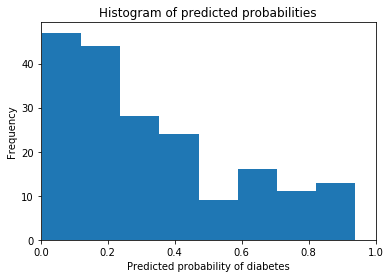

In [126]:
# histogram of predicted probabilities
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

__Decrease the threshold__ for predicting diabetes in order to __increase the sensitivity__ of the classifier

In [127]:
# predict diabetes if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], 0.3)[0]

In [128]:
# print the first 10 predicted probabilities
y_pred_prob[0:10]

array([0.90262761, 0.1817173 , 0.0975644 , 0.60933942, 0.10512392,
       0.04739274, 0.67112941, 0.78699539, 0.19367476, 0.41050505])

In [129]:
# print the first 10 predicted classes with the lower threshold
y_pred_class[0:10]

array([1., 0., 0., 1., 0., 0., 1., 1., 0., 1.])

In [130]:
# previous confusion matrix (default threshold of 0.5)
print(confusion)

[[117  13]
 [ 28  34]]


In [131]:
# new confusion matrix (threshold of 0.3)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[93 37]
 [12 50]]


In [132]:
# sensitivity has increased (used to be 0.24)
print(53 / float(53 + 9))
print(metrics.recall_score(y_test, y_pred_class))

0.8548387096774194
0.8064516129032258


In [133]:
# specificity has decreased (used to be 0.91)
print(89 / float(89 + 41))

0.6846153846153846


**Conclusion:**

- Threshold of 0.5 is used by default (for binary problems) to convert predicted probabilities into class predictions
- Threshold can be adjusted to increase sensitivity or specificity
- Sensitivity and specificity have an inverse relationship

## ROC Curves and Area Under the Curve (AUC)
__Question:__ Wouldn't it be nice if we could see how sensitivity and specificity are affected by various thresholds, without actually changing the threshold?

**Answer:** Plot the ROC curve!

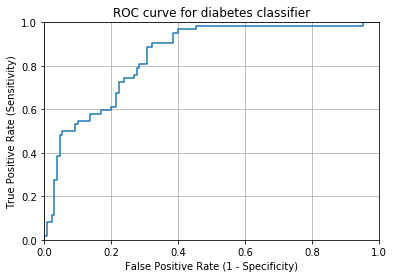

In [134]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

- ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context
- You can't actually see the thresholds used to generate the curve on the ROC curve itself

In [135]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [136]:
evaluate_threshold(0.5)

Sensitivity: 0.5483870967741935
Specificity: 0.9


In [137]:
evaluate_threshold(0.3)

Sensitivity: 0.8064516129032258
Specificity: 0.7153846153846154


In [138]:
for i in range (1,10):
    print("For",i/10)
    evaluate_threshold(i/10)

For 0.1
Sensitivity: 0.9838709677419355
Specificity: 0.5461538461538462
For 0.2
Sensitivity: 0.967741935483871
Specificity: 0.6
For 0.3
Sensitivity: 0.8064516129032258
Specificity: 0.7153846153846154
For 0.4
Sensitivity: 0.5967741935483871
Specificity: 0.8307692307692307
For 0.5
Sensitivity: 0.5483870967741935
Specificity: 0.9
For 0.6
Sensitivity: 0.5
Specificity: 0.9461538461538461
For 0.7
Sensitivity: 0.27419354838709675
Specificity: 0.9615384615384616
For 0.8
Sensitivity: 0.11290322580645161
Specificity: 0.9692307692307692
For 0.9
Sensitivity: 0.016129032258064516
Specificity: 0.9923076923076923


AUC is the percentage of the ROC plot that is underneath the curve:

In [139]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.8449131513647642


- AUC is useful as a single number summary of classifier performance.
- If you randomly chose one positive and one negative observation, AUC represents the likelihood that your classifier will assign a higher predicted probability to the positive observation.
- AUC is useful even when there is high class imbalance (unlike classification accuracy).

In [140]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

0.822974358974359